## Creating and Manipulating a GeoDataFrame for New York City Buildings

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### 1.- Loading the New York City building dataset


In [2]:
url = 'https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson'
geoDataFrame = gpd.read_file(url);
geoDataFrame.head()

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,2,15.05,23.30,19.18,6365.72,36,New York,"POLYGON ((-74.00129 40.71992, -74.00061 40.719..."
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.00320 40.71654, -74.00265 40.716..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."


### 2.- Plot of the building footprints based on the building height

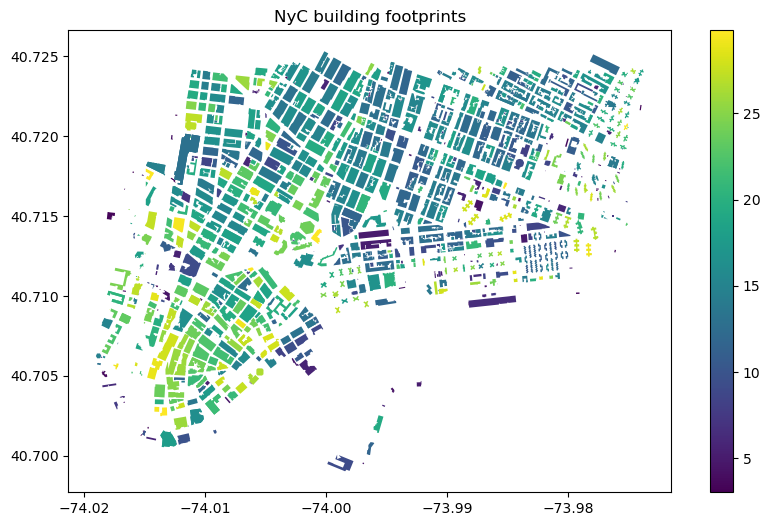

In [3]:
geoDataFrame.plot('height_MS', legend=True, figsize=(10,6))
plt.title('NyC building footprints');
plt.show();

### 3.- Interactive map of the building footprints based on the building height


In [4]:
geoDataFrame.explore('height_MS', legend=True)

### 4.- Average building height


In [5]:
averageBuildingHeight = geoDataFrame['height_MS'].mean()
averageBuildingHeight

15.454691136974038

### 5.- Selecting buildings with a height greater than the average height


In [6]:
heavyBuildings = geoDataFrame[geoDataFrame['height_MS'] > averageBuildingHeight]
heavyBuildings.head()

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.00320 40.71654, -74.00265 40.716..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
5,38,18.84,NaN,18.84,1151.88,36,New York,"POLYGON ((-74.01574 40.70672, -74.01537 40.706..."


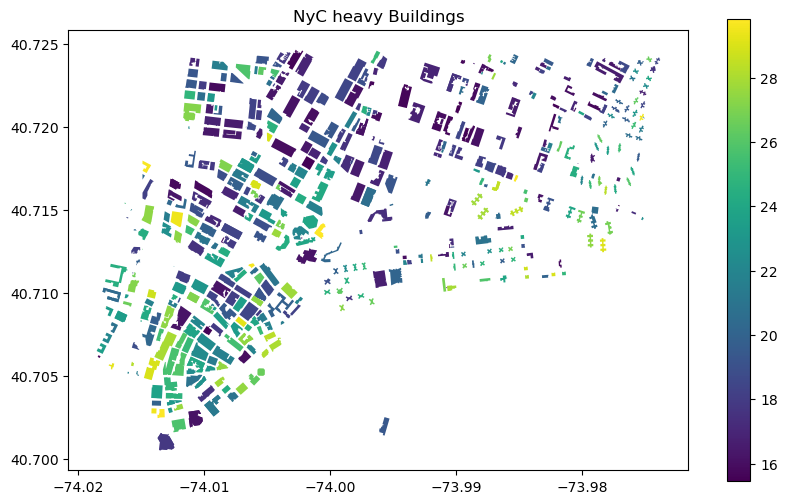

In [7]:
heavyBuildings.plot('height_MS', legend = True, figsize=(10,6))
plt.title('NyC heavy Buildings')
plt.show()

In [8]:
heavyBuildings.explore('height_MS', legend=True)

### 6- Saving the new GeoDataFrame to a new GeoJSON file

In [9]:
output_file = 'heavyNyCBuildings.geojson';
geoDataFrame.to_file(output_file, driver="GeoJSON")